<a href="https://colab.research.google.com/github/shazaelmorsh/Machine-Learning-Concepts/blob/main/Decision_Trees%2C_Random_Forest_and_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

## Decision Trees : Understanding

In a decision tree, we decide if a node will be split or not by looking at the **information gain** that split would give us.

On each node, we compute the information gain for each feature, then split the node on the feature with the higher information gain, by comparing the entropy of the node with the weighted entropy in the two splitted nodes
Where

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

and $H$ is the entropy, defined as

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

- $w^{\text{left}}$ and $w^{\text{right}}$, the proportion of animals in **each node**.
- $p^{\text{left}}$ and $p^{\text{right}}$, the proportion of cats in **each split**.

In [23]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#we will use one hot encoding to encode the categorical features
# x values : [ear (pointy = 1, floppy =0) , face (round =1 , not round =1), whiskers (present =1, absent=1) ]
# y values : 1 cat, 0 not cat

#creating dataset
x_train = np.array([
    [1, 1, 1],
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 1],
    [1, 1, 1],
    [1, 1, 0],
    [0, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 1, 0]
                  ])
y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [25]:
def entropy(p):
  if p == 0 or p ==1:
    return 0
  else:
    return -p*np.log2(p) - (1 - p)*np.log2(1 - p)

print(entropy(0.5))

1.0


In [26]:
#this fuction extract the indices of the training set where the features exists in the left and right tree
def split_indices(X, index_feature):
  left = []
  right =[]
  for i in range(X.shape[0]):
    if X[i][index_feature] == 1:
      left.append(i)
    else:
      right.append(i)
  return left, right

def weighted_entropy(x,y,l,r):
  w_left = len(l)/len(x)
  w_right = len(r)/len(x)
  p_left = sum(y[l])/len(l)
  p_right = sum(y[r])/len(r)
  return w_left*entropy(p_left) + w_right * entropy(p_right)

l , r = split_indices(x_train, 0)
# weighted_entropy(x_train,y_train,l,r)

def information_gain(x,y,l,r):
  p = sum(y)/len(y)
  h = entropy(p)
  w = weighted_entropy(x,y,l,r)
  return  h-w
information_gain(x_train,y_train,l,r)

0.2780719051126377

In [27]:
for i in range(0,3):
  l , r = split_indices(x_train, i)
  i_gain = information_gain(x_train,y_train,l,r)
  print(f"Feature with index {i} the gain will be {i_gain:.2f}")

Feature with index 0 the gain will be 0.28
Feature with index 1 the gain will be 0.03
Feature with index 2 the gain will be 0.12


## Using Skilearn

###imports

In [28]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install xgboost --quiet
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

RANDOM_STATE = 55

In [29]:
df = pd.read_csv("heart.csv")
df.head()
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(len(df[column].unique()))
    print()

Unique values in column 'Age':
50

Unique values in column 'Sex':
2

Unique values in column 'ChestPainType':
4

Unique values in column 'RestingBP':
67

Unique values in column 'Cholesterol':
222

Unique values in column 'FastingBS':
2

Unique values in column 'RestingECG':
3

Unique values in column 'MaxHR':
119

Unique values in column 'ExerciseAngina':
2

Unique values in column 'Oldpeak':
53

Unique values in column 'ST_Slope':
3

Unique values in column 'HeartDisease':
2



In [30]:
cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]
# adding columns with one hot encoding
df_encoded = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables)
print(len(df_encoded.columns))
#extract all columns except the target
var = [x for x in df_encoded.columns if x not in 'HeartDisease'] ## Removing our target variable
print(len(var))


21
20


###splitting the data

In [31]:
help(train_test_split)


Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded[var], df_encoded['HeartDisease'], train_size = 0.8, random_state = RANDOM_STATE)


###building the model

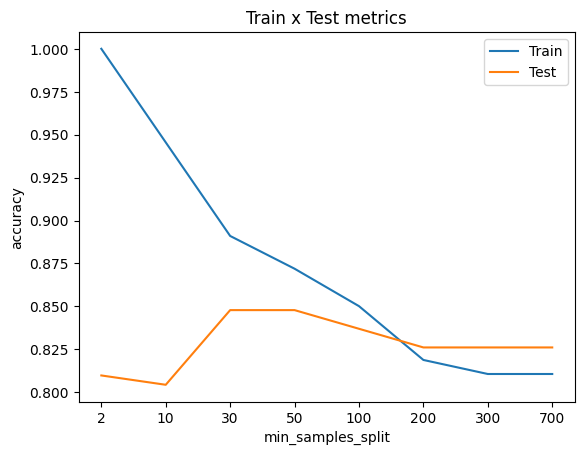

In [45]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

In [41]:
print(f"{min_samples_split_list[np.argmax(accuracy_list_train) + 1]}")
print(f"{min_samples_split_list[np.argmax(accuracy_list_test) + 1]}")


10
50


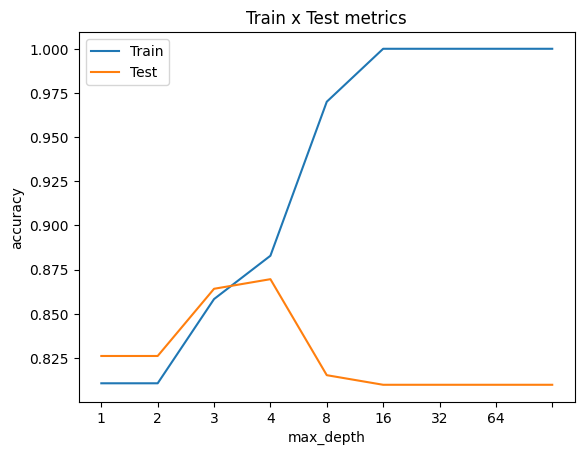

In [43]:
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

In [46]:
print(f"{min_samples_split_list[np.argmax(accuracy_list_train) + 1]}")
print(f"{min_samples_split_list[np.argmax(accuracy_list_test) + 1]}")

10
50


In [48]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 50,
                                             max_depth = 3,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [49]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(decision_tree_model.predict(X_test),y_test):.4f}")


Metrics train:
	Accuracy score: 0.8583
Metrics test:
	Accuracy score: 0.8641


#Random Forest

the for a Random Forest, you use a subset of the features AND a subset of the training set to train each tree, chosen randomly.

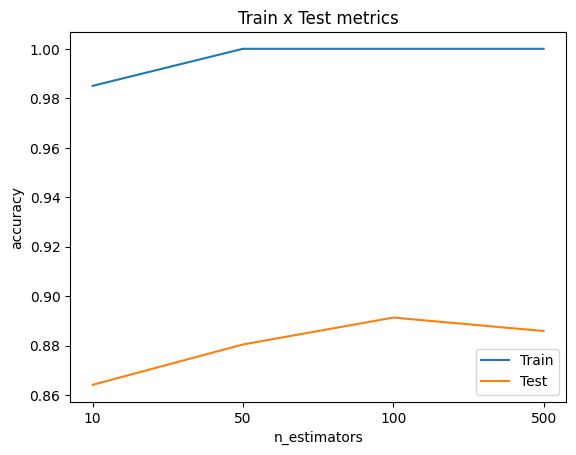

In [51]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train,y_train)
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

#XGBoost

the boosting methods train several trees, but instead of them being uncorrelated to each other

One interesting thing about the XGBoost is that it allows, during the fit, to pass a list evaluation datasets of the form (X_val,y_val), where on each iteration, it measures the cost (or evaluation metric) on the evaluation datasets so that once the cost (or metric) stops to descrease for a number of rounds (called early_stopping_rounds), the training will stop. This is how we can automatically control how many estimators is enough, and how we can avoid overfitting due to too many estimators.

In [52]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RANDOM_STATE)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds = 50)

[0]	validation_0-logloss:0.63302
[1]	validation_0-logloss:0.59554


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-logloss:0.56614
[3]	validation_0-logloss:0.54187
[4]	validation_0-logloss:0.52349
[5]	validation_0-logloss:0.50611
[6]	validation_0-logloss:0.49373
[7]	validation_0-logloss:0.48366
[8]	validation_0-logloss:0.47323
[9]	validation_0-logloss:0.46538
[10]	validation_0-logloss:0.46000
[11]	validation_0-logloss:0.45621
[12]	validation_0-logloss:0.45483
[13]	validation_0-logloss:0.44975
[14]	validation_0-logloss:0.44495
[15]	validation_0-logloss:0.44073
[16]	validation_0-logloss:0.44078
[17]	validation_0-logloss:0.43936
[18]	validation_0-logloss:0.44206
[19]	validation_0-logloss:0.44536
[20]	validation_0-logloss:0.44322
[21]	validation_0-logloss:0.44310
[22]	validation_0-logloss:0.44419
[23]	validation_0-logloss:0.44797
[24]	validation_0-logloss:0.44843
[25]	validation_0-logloss:0.45337
[26]	validation_0-logloss:0.45206
[27]	validation_0-logloss:0.45435
[28]	validation_0-logloss:0.45316
[29]	validation_0-logloss:0.45524
[30]	validation_0-logloss:0.45401
[31]	validation_0-logl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=55, ...)

In [53]:
xgb_model.best_iteration
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")


Metrics train:
	Accuracy score: 0.9319
Metrics test:
	Accuracy score: 0.8533
